In [98]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [99]:
# load csvs of data
mouse_csv_path = "./data/Mouse_metadata.csv"
study_csv_path = './data/Study_results.csv'
# preview both
mouse_og_df = pd.read_csv(mouse_csv_path)
mouse_og_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [100]:
study_og_df = pd.read_csv(study_csv_path)
study_og_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [101]:
# merge the two
merged_data = pd.merge(study_og_df, mouse_og_df, how='left', on=["Mouse ID","Mouse ID"])

merged_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [124]:
# check for dups
dups_check = merged_data['Mouse ID'].duplicated().any()
print("Dup Check #1:", dups_check)
print("Mouse ID Count: ", merged_data['Mouse ID'].count())
unique_mouse_data = merged_data.drop_duplicates(keep=False)
dups_check_2 = unique_mouse_data['Mouse ID'].duplicated().any()
print("Dup Check #2:", dups_check_2)
print("Mouse ID Count #2: ", unique_mouse_data['Mouse ID'].count())


Dup Check #1: True
Mouse ID Count:  1893
Dup Check #2: True
Mouse ID Count #2:  1891


In [128]:
# Use the unique mouse data to create a summary dataframe
# mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_tumors_summary = unique_mouse_data.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
median_tumors_summary = unique_mouse_data.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
std_tumors_summary =unique_mouse_data.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
sem_tumors_summary = unique_mouse_data.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

summary_tumor_vol = pd.DataFrame({
    "Mean Tumor Volume (mm3)": mean_tumors_summary,
    "Median Tumor Volume (mm3)": median_tumors_summary,
    "Standard Deviation": std_tumors_summary,
    "Standard Error":sem_tumors_summary
})

summary_tumor_vol

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Standard Deviation,Standard Error
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,7.821003,0.581331
Propriva,52.414660,50.965298,6.496144,0.515178
Ramicane,40.216745,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,7.710419,0.573111


In [133]:
# Pie Plot for Male v Female mice..first get the count of each gender and make a new DataFrame from the unique mice
mouse_gender = pd.DataFrame(unique_mouse_data['Sex'].value_counts().astype(int))
mouse_gender

,Sex
Male,958
Female,933


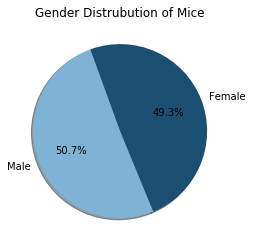

In [140]:
# Pie plot using matplotlib...
genders = ['Male', 'Female']
colors = ["#7FB3D5", "#1B4F72"]
plt.pie(mouse_gender, labels=genders, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=110)
plt.title('Gender Distrubution of Mice')
plt.savefig('./images/genderPiePlot.png')
plt.show()

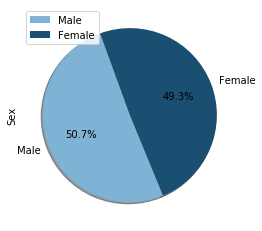

In [149]:
# Pie plot using Pandas.plot syntax...not identical but pretty close!
# TODO hide legend, yAxis title
pie_plot = mouse_gender.plot.pie(y='Sex', colors=colors, autopct="%1.1f%%", shadow=True, startangle=110)
pie_plot

In [102]:
# group the data, then get the mean tumor volume for each drup treatment, then convert to df
mean_tumors = pd.DataFrame(merged_data.groupby(["Drug Regimen", "Timepoint"]).mean()["Tumor Volume (mm3)"])
# above will be multi-indexed, need to flatten the DataFrame...
mean_tumors.reset_index(inplace=True) 
mean_tumors 

,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [103]:
# do the same to for the Standard Error Mean with sem method
sem_tumors = pd.DataFrame(merged_data.groupby(["Drug Regimen", "Timepoint"]).sem()["Tumor Volume (mm3)"])
sem_tumors.reset_index(inplace=True)
sem_tumors.set_index('Timepoint')

sem_tumors

,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
...,...,...,...
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515


In [104]:
# reformat the dfs for plotting by timepoint
mean_tumors_formatted = mean_tumors.pivot(index='Timepoint', columns='Drug Regimen')["Tumor Volume (mm3)"]
sem_tumors_formatted = sem_tumors.pivot(index='Timepoint', columns='Drug Regimen')["Tumor Volume (mm3)"]



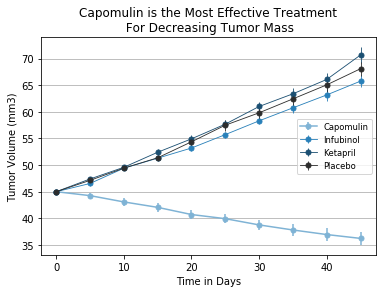

In [105]:
# Create the tumor volume v. time plot using plotly
# make a plot for Capomulin
plt.errorbar(
    mean_tumors_formatted.index, 
    mean_tumors_formatted["Capomulin"], 
    yerr=sem_tumors_formatted["Capomulin"], 
    color="#7FB3D5", 
    marker="o", 
    markersize=5, 
    # linestyle="dashed", 
    linewidth=1.5)
# Infubinol plot
plt.errorbar(
    mean_tumors_formatted.index, 
    mean_tumors_formatted["Infubinol"], 
    yerr=sem_tumors_formatted["Infubinol"], 
    color="#2980B9", 
    marker="o", 
    markersize=5, 
    # linestyle="dashed", 
    linewidth=0.85)
# Ketapril plot
plt.errorbar(
    mean_tumors_formatted.index, 
    mean_tumors_formatted["Ketapril"], 
    yerr=sem_tumors_formatted["Ketapril"], 
    color="#1B4F72", 
    marker="o", 
    markersize=5, 
    # linestyle="dashed", 
    linewidth=0.85)
# Placebo plot
plt.errorbar(
    mean_tumors_formatted.index, 
    mean_tumors_formatted["Placebo"], 
    yerr=sem_tumors_formatted["Placebo"], 
    color="#2d2d2d", 
    marker="o", 
    markersize=5, 
    # linestyle="dashed", 
    linewidth=0.85)
# Titles and legends
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time in Days")
plt.grid(axis='y')
plt.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'],loc="center right", fontsize="small", fancybox=True)
plt.title("Capomulin is the Most Effective Treatment\n For Decreasing Tumor Mass")
plt.savefig('./images/tumorMass.png')
plt.show()

In [ ]:
# TODO! re-do above plot so it looks identical, but made with Pandas.plot syntax